In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('housing_price_dataset.csv')

In [27]:
df.shape

(50000, 6)

In [28]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [30]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [31]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


Doing one hot encoding before Standard Scaler, changes the values of one hot encoding.

Check Link for information -> https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

In [32]:
one_hot_encoded = pd.get_dummies(df['Neighborhood'])
one_hot_encoded = one_hot_encoded.astype(int)
print(one_hot_encoded)

       Rural  Suburb  Urban
0          1       0      0
1          1       0      0
2          0       1      0
3          0       0      1
4          0       1      0
...      ...     ...    ...
49995      1       0      0
49996      0       1      0
49997      0       1      0
49998      1       0      0
49999      1       0      0

[50000 rows x 3 columns]


In [33]:
df = pd.concat([df,one_hot_encoded], axis = 1)

In [34]:
df = df.drop(columns= ['Neighborhood'])

In [35]:
y = df['Price']
x = df.copy()
x = x.drop(columns= ['Price'])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
y_train = ytrain.values
x_train = xtrain.values

x_test = xtest.values
y_test = ytest.values


In [39]:
y_test

array([170835.03571296, 126913.46999812, 246611.88309183, ...,
       352184.12397599, 244830.80523805, 246512.28459671])

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

#model.score(x_test_scaled, y_test)
y_test_pred

array([218329.49032129, 135025.03293153, 255260.82445864, ...,
       310675.23692328, 200904.11512863, 244037.84596718])

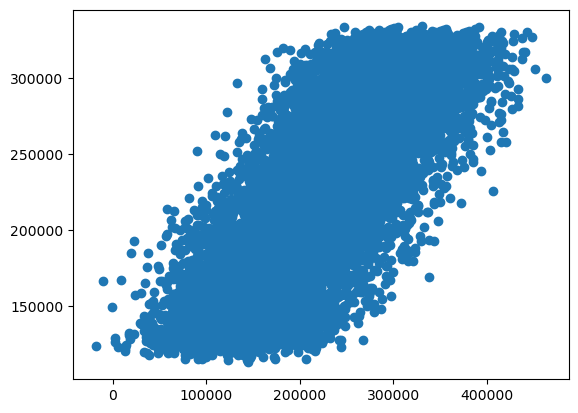

In [42]:
import matplotlib.pyplot as plt

#x_axis = np.arange(1,12501,dtype=int)
#plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_test_pred)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state= 42)

In [44]:
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [45]:
y_pred_random = random_forest_model.predict(x_test)
random_forest_model.score(x_test, y_test)

0.574283058250988

In [46]:
y_test

array([170835.03571296, 126913.46999812, 246611.88309183, ...,
       352184.12397599, 244830.80523805, 246512.28459671])

In [47]:
y_pred_random

array([218573.92482078, 129327.28142696, 252282.38884532, ...,
       314612.0553523 , 195951.62254363, 244693.63000187])

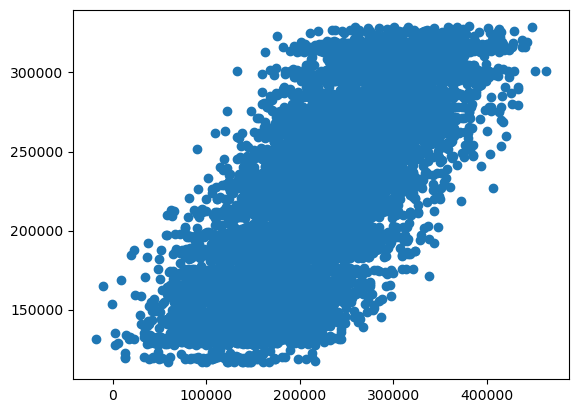

In [48]:
plt.scatter(y_test,y_pred_random)
plt.show()